# How to avoid flight delays
## by Mohamed Ibrahim

## Investigation Overview

> Is there a relationship between the travelling month/day of month/day of week and the number of delayed flights?
> Is booking a flight in the morning have an effected on expected delay than booking an evening flight ?


## Dataset Overview

> The dataset contain all the domestic US flights data in 2007. This data include time, date, delays and etc...

In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('2007.csv')

In [3]:
df.columns= df.columns.str.lower()
df['overall_delay'] = df['carrierdelay'] +df['weatherdelay'] +df['nasdelay'] 
+ df['securitydelay'] + df['lateaircraftdelay']
df['delayed'] = np.where(df['overall_delay']>0, True, False)
#Remove the minutes from the departure time column and only including the hour
conditions = [
    (df['deptime'] < 60),
    (df['deptime'] > 60) & (df['deptime'] < 160),
    (df['deptime'] > 200) & (df['deptime'] < 260),
    (df['deptime'] > 300) & (df['deptime'] < 360),
    (df['deptime'] > 400) & (df['deptime'] < 460),
    (df['deptime'] > 500) & (df['deptime'] < 560),
    (df['deptime'] > 600) & (df['deptime'] < 660),
    (df['deptime'] > 700) & (df['deptime'] < 760),
    (df['deptime'] > 800) & (df['deptime'] < 860),
    (df['deptime'] > 900) & (df['deptime'] < 960),
    (df['deptime'] > 1000) & (df['deptime'] < 1060),
    (df['deptime'] > 1100) & (df['deptime'] < 1160),
    (df['deptime'] > 1200) & (df['deptime'] < 1260),
    (df['deptime'] > 1300) & (df['deptime'] < 1360),
    (df['deptime'] > 1400) & (df['deptime'] < 1460),
    (df['deptime'] > 1500) & (df['deptime'] < 1560),
    (df['deptime'] > 1600) & (df['deptime'] < 1660),
    (df['deptime'] > 1700) & (df['deptime'] < 1760),
    (df['deptime'] > 1800) & (df['deptime'] < 1860),
    (df['deptime'] > 1900) & (df['deptime'] < 1960),
    (df['deptime'] > 2000) & (df['deptime'] < 2060),
    (df['deptime'] > 2100) & (df['deptime'] < 2160),
    (df['deptime'] > 2200) & (df['deptime'] < 2260),
    (df['deptime'] > 2300) & (df['deptime'] < 2360)
    ]


values = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

# create a new column and use np.select to assign values to it using our lists as arguments
df['deptime'] = np.select(conditions, values)
df_delayed = df[df['delayed']].copy()
# Making the figure bigger so it is easier to see trends
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,8

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> If you have booked a domestic flight in 2007, there is a 20% chance that you would have to waited for you flight a bit more than you anticipated. But little that you know that this 20% chance depend on what month are you travelling in


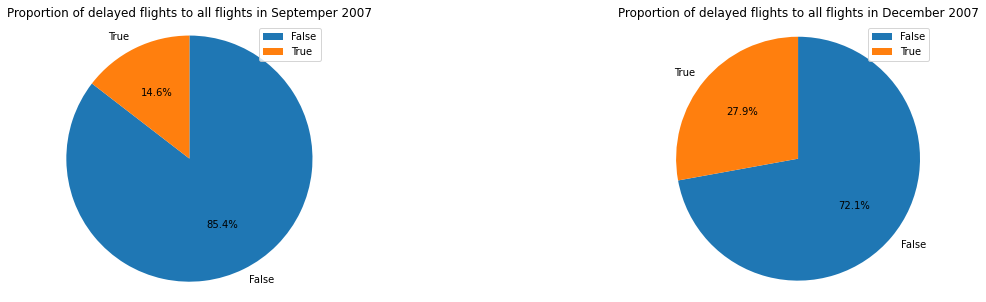

In [4]:
#With the difference in the number of delayed flights per month and number of on-time flights
#I wanted to explore how this differnece differ from two months (especially september as it has the lowest number of delayed flights)
plt.figure(figsize = [20, 5])


# Pie plot ON LEFT: Septemper
plt.subplot(1, 2, 1)

sep_fligths = df[df['month']==9].delayed.value_counts() / df[df['month']==9].shape[0]
plt.title("Proportion of delayed flights to all flights in Septemper 2007")
plt.pie(sep_fligths, labels = sep_fligths.index, startangle = 90, counterclock = False,autopct='%.1f%%')
plt.axis('square')
plt.legend();
# Pie plot ON Right: December
plt.subplot(1, 2, 2)

dec_fligths = df[df['month']==12].delayed.value_counts() / df[df['month']==12].shape[0]
plt.title("Proportion of delayed flights to all flights in December 2007")
plt.pie(dec_fligths, labels = dec_fligths.index, startangle = 90, counterclock = False,autopct='%.1f%%')
plt.axis('square')
plt.legend();


## (Visualization 2)

> However, you shouldn't expect big delays, ~75% of all delays are 45mins or less with a median of 25 mins

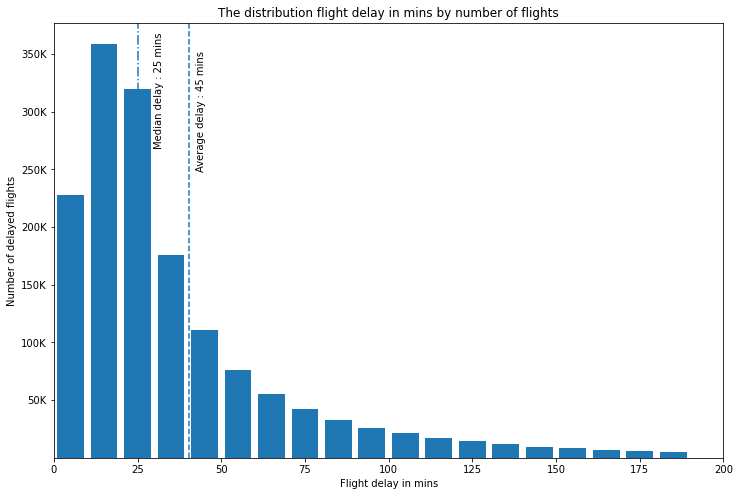

In [5]:
#Adjusting the axis to remove the outliers and get an understanding of the delay
bins = np.arange(0, 200, 10)
plt.hist(data = df_delayed, x = 'overall_delay', bins = bins,rwidth = 0.8);
plt.xlim((0,200));
plt.axvline(df_delayed.overall_delay.mean(),ls='--');
plt.axvline(df_delayed.overall_delay.median(),ls='-.');
plt.title('The distribution flight delay in mins by number of flights')
plt.xlabel('Flight delay in mins');
ticks = [50000, 100000, 150000, 200000, 250000, 300000, 350000]
labels = ['50K','100K','150K','200K','250K','300K','350K']
plt.yticks(ticks,labels);
plt.ylabel('Number of delayed flights')


plt.text(df_delayed.overall_delay.mean()+2,250000,'Average delay : 45 mins',rotation=90)
plt.text(df_delayed.overall_delay.median()+5,270000,'Median delay : 25 mins',rotation=90);



## (Visualization 3)

> Apart from trying to travel in Septemper than in Decmeber, you should try to book flight that have an early morning departure time. Flights that leave at night are more prone to delays than flights in the morning.


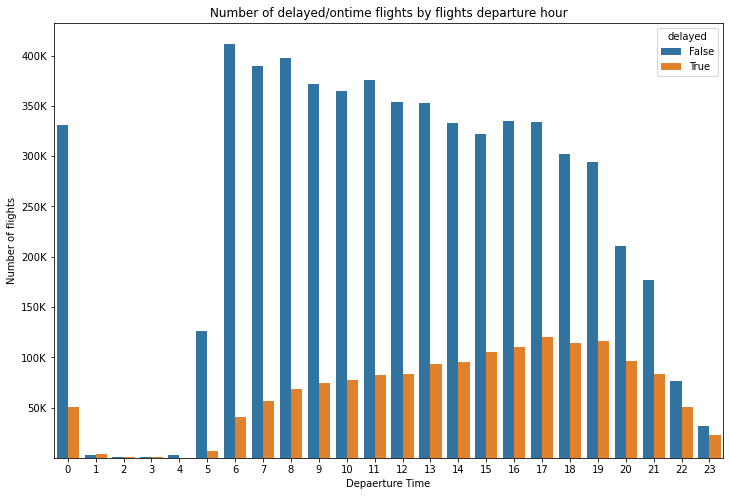

In [6]:
#Getting the number of flights which are delayed to the number of flights which are not delayed by departure hour
sns.countplot(data = df, x = 'deptime', hue = 'delayed');
plt.title('Number of delayed/ontime flights by flights departure hour');
plt.xlabel('Depaerture Time')
plt.ylabel('Number of flights')
ticks = [50000, 100000, 150000, 200000, 250000, 300000, 350000,400000]
labels = ['50K','100K','150K','200K','250K','300K','350K','400K']
plt.yticks(ticks,labels);

## (Visualization 4)

> They also have on average longer delays than the morning flights. 

*note: flights that leave in the period from 1 am to 3 am have very high average delays but they are very rare


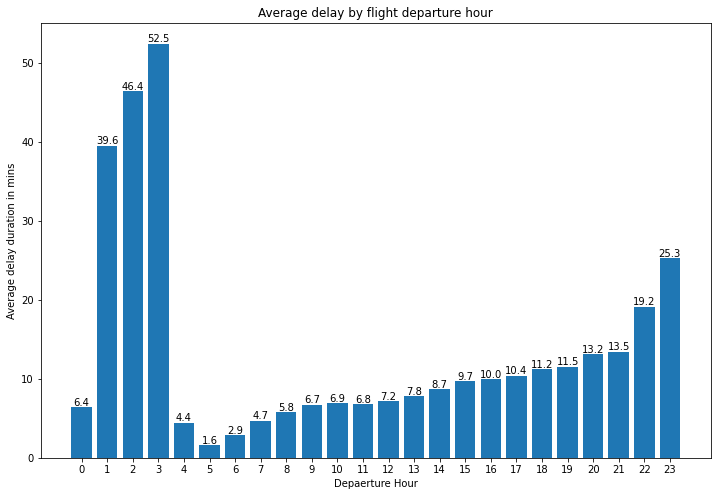

In [7]:
#Understanding the average delay per flight for departing hour 
x = df.groupby('deptime').mean()['overall_delay'].index

# Return the Series having frequency count of each unique value
y = df.groupby('deptime').mean()['overall_delay']

plt.bar(x, y)

# Labeling the axes
plt.xlabel('Departure time')
plt.ylabel('Average delay per fligth')

plt.xticks(x);


for i in y.index:
    count = y[i]
    plt.text(i,count+0.2, round(count,1), ha = 'center');
    
plt.title('Average delay by flight departure hour');
plt.xlabel('Depaerture Hour')
plt.ylabel('Average delay duration in mins');

In [15]:
!jupyter nbconvert --to slides --TemplateExporter.exclude_input=True How_to_avoid_flight_delays.ipynb

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook How_to_avoid_flight_delays.ipynb to slides
[NbConvertApp] Writing 681490 bytes to How_to_avoid_flight_delays.slides.html
